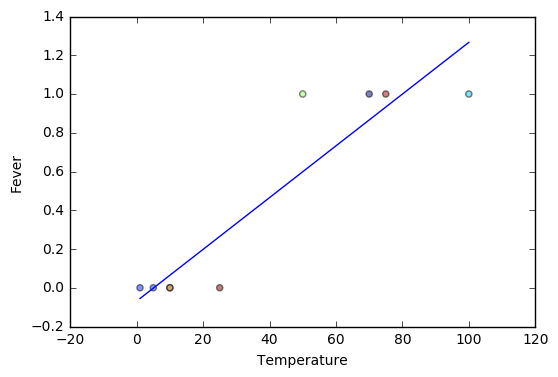

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel('Fever')
plt.xlabel('Temperature')

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [13]:
import math
print(- math.log(1 - 0.00001))
print(- math.log(1 - 0.99999))

1.0000050000287824e-05
11.51292546497478


In [14]:
print(math.log(0.999999))
print(math.log(0.000001))

-1.000000500029089e-06
-13.815510557964274


In [15]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [37]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

In [38]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [39]:
len(train_dataset)

60000

In [40]:
type(train_dataset[0])

tuple

In [41]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [42]:
train_dataset[0][1]

5

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [44]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [45]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

In [46]:
show_img.shape

(28, 28)

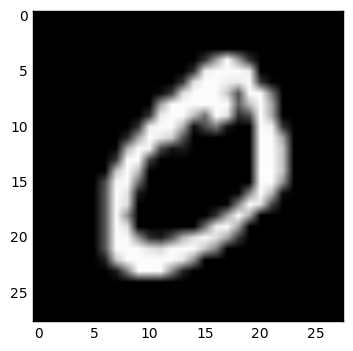

In [47]:
plt.imshow(show_img, cmap='gray')

In [48]:
train_dataset[1][1]

0

In [49]:
test_dataset = dsets.MNIST(root='./data',
                           train=False,  # test data
                           transform=transforms.ToTensor())

In [50]:
len(test_dataset)

10000

In [51]:
type(test_dataset[0])

tuple

In [52]:
test_dataset[0][0].size()

torch.Size([1, 28, 28])

In [53]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)

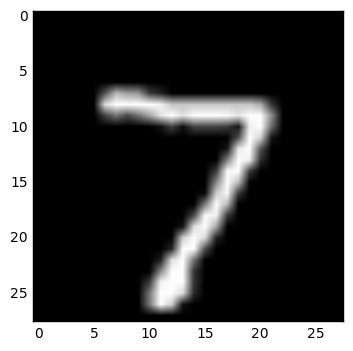

In [54]:
plt.imshow(show_img, cmap='gray')

In [55]:
test_dataset[0][1]

7

In [56]:
len(train_dataset)

60000

In [57]:
batch_size = 100
n_iters = 3000

In [58]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

In [59]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [60]:
train_loader

In [62]:
import collections
isinstance(train_loader, collections.Iterable)

True

In [70]:
isinstance([1, 2, 3], collections.Iterable)

True

In [65]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [66]:
isinstance(test_loader, collections.Iterable)

True

In [71]:
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]

In [73]:
for i in lst:
    print(i.shape)

(28, 28)
(28, 28)


In [87]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [88]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [89]:
input_dim = 28 * 28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

In [90]:
model

LogisticRegressionModel (
  (linear): Linear (784 -> 10)
)

In [91]:
criterion = nn.CrossEntropyLoss()

In [92]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [94]:
print(model.parameters())

<generator object Module.parameters at 0x11619eaf0>


In [96]:
len(list(model.parameters()))

2

In [100]:
list(model.parameters())[0].size()

torch.Size([10, 784])

In [103]:
list(model.parameters())[1].size()

torch.Size([10])

In [106]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28 * 28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 1.326096773147583. Accuracy: 79.43
Iteration: 1000. Loss: 1.1492043733596802. Accuracy: 81.22
Iteration: 1500. Loss: 1.0160795450210571. Accuracy: 82.09
Iteration: 2000. Loss: 1.0536803007125854. Accuracy: 82.81
Iteration: 2500. Loss: 0.8718180656433105. Accuracy: 83.4
Iteration: 3000. Loss: 0.8440992832183838. Accuracy: 83.76


In [118]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, dim=1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[2])
        
        print('LABEL SIZE')
        print(labels.size())
        
        print('LABEL FOR IMAGE 0')
        print(labels[2])

PREDICTION
1
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 0
1


In [119]:
correct = 0
total = 0
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, dim=1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
accuracy = 100 * (correct / total)
print(accuracy)

83.76


In [121]:
import numpy as np
a = np.ones((10))
print(a)
b = np.ones((10))
print(b)

print(a == b)
print((a == b).sum())

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ True  True  True  True  True  True  True  True  True  True]
10


In [122]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'awesome_model.pkl')

In [127]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 28 * 28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

if torch.cuda.is_available():
    model.cuda()

criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 28 * 28).cuda())
            labels = Variable(labels)
        else:
            images = Variable(images.view(-1, 28 * 28))
            labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 28 * 28).cuda())
                else:
                    images = Variable(images.view(-1, 28 * 28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 1.8981208801269531. Accuracy: 69.46
Iteration: 1000. Loss: 1.550734519958496. Accuracy: 77.06
Iteration: 1500. Loss: 1.3412822484970093. Accuracy: 79.67
Iteration: 2000. Loss: 1.1279243230819702. Accuracy: 81.44
Iteration: 2500. Loss: 1.123995065689087. Accuracy: 82.65
Iteration: 3000. Loss: 1.0406237840652466. Accuracy: 83.46


In [128]:
import torch
import torch.nn as nn

In [129]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [130]:
input_dim = 28 * 28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

In [131]:
model

LogisticRegressionModel (
  (linear): Linear (784 -> 10)
)

In [132]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [133]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

In [134]:
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [135]:
len(train_dataset)

60000

In [136]:
len(test_dataset)

10000

In [139]:
batch_size = 100
n_iters = 3000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))

In [140]:
num_epochs

5

In [141]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [142]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [145]:
len(train_loader)

600

In [180]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [181]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

In [182]:
model

FeedforwardNeuralNetModel (
  (fc1): Linear (784 -> 100)
  (relu): ReLU ()
  (fc2): Linear (100 -> 10)
)

In [183]:
criterion = nn.CrossEntropyLoss()

In [184]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [185]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28 * 28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 0.2050723433494568. Accuracy: 90.78
Iteration: 1000. Loss: 0.32591530680656433. Accuracy: 92.92
Iteration: 1500. Loss: 0.1316073089838028. Accuracy: 94.06
Iteration: 2000. Loss: 0.14626473188400269. Accuracy: 94.71
Iteration: 2500. Loss: 0.15248048305511475. Accuracy: 95.35
Iteration: 3000. Loss: 0.1945464015007019. Accuracy: 95.7


In [186]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.relu2(out)
        
        out = self.fc3(out)
        return out

In [188]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
print(model)

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28 * 28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

FeedforwardNeuralNetModel (
  (fc1): Linear (784 -> 100)
  (relu1): ReLU ()
  (fc2): Linear (100 -> 100)
  (relu2): ReLU ()
  (fc3): Linear (100 -> 10)
)
Iteration: 500. Loss: 0.23548069596290588. Accuracy: 90.77
Iteration: 1000. Loss: 0.17562934756278992. Accuracy: 93.71
Iteration: 1500. Loss: 0.09904137253761292. Accuracy: 95.08
Iteration: 2000. Loss: 0.20060373842716217. Accuracy: 95.82
Iteration: 2500. Loss: 0.10273163765668869. Accuracy: 96.31
Iteration: 3000. Loss: 0.10748293995857239. Accuracy: 96.59


In [189]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()

        self.fc4 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.relu2(out)
        
        out = self.fc3(out)
        out = self.relu3(out)
        
        out = self.fc4(out)

        return out

In [193]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
print(model)

if torch.cuda.is_available():
    model.cuda()

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 28 * 28).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 28 * 28))
            labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 28 * 28).cuda())
                else:
                    images = Variable(images.view(-1, 28 * 28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

FeedforwardNeuralNetModel (
  (fc1): Linear (784 -> 100)
  (relu1): ReLU ()
  (fc2): Linear (100 -> 100)
  (relu2): ReLU ()
  (fc3): Linear (100 -> 100)
  (relu3): ReLU ()
  (fc4): Linear (100 -> 10)
)
Iteration: 500. Loss: 0.4455902576446533. Accuracy: 89.87
Iteration: 1000. Loss: 0.1993386596441269. Accuracy: 92.93
Iteration: 1500. Loss: 0.09530012309551239. Accuracy: 95.63
Iteration: 2000. Loss: 0.16186055541038513. Accuracy: 96.31
Iteration: 2500. Loss: 0.07348878681659698. Accuracy: 96.8
Iteration: 3000. Loss: 0.12558738887310028. Accuracy: 96.66


# Convolutional Neural Network

In [194]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [195]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [203]:
train_dataset.train_data.size()

torch.Size([60000, 28, 28])

In [207]:
train_dataset.train_labels.size()

torch.Size([60000])

In [205]:
test_dataset.test_data.size()

torch.Size([10000, 28, 28])

In [208]:
test_dataset.test_labels.size()

torch.Size([10000])

In [210]:
batch_size = 100
n_iters = 3000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))

In [211]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [214]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(32 * 7 * 7, 10)
    
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        
        out = out.view(out.size(0), -1)
        
        out = self.fc1(out)
        
        return out

In [215]:
model = CNNModel()

In [216]:
model

CNNModel (
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU ()
  (maxpool1): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU ()
  (maxpool2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (fc1): Linear (1568 -> 10)
)

In [223]:
len(list(model.parameters()))

6

In [222]:
list(model.parameters())[0].size()

torch.Size([16, 1, 5, 5])

In [224]:
list(model.parameters())[1].size()

torch.Size([16])

In [225]:
list(model.parameters())[2].size()

torch.Size([32, 16, 5, 5])

In [226]:
list(model.parameters())[3].size()

torch.Size([32])

In [227]:
list(model.parameters())[4].size()

torch.Size([10, 1568])

In [228]:
list(model.parameters())[5].size()

torch.Size([10])

In [217]:
criterion = nn.CrossEntropyLoss()

In [230]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 0.1091565191745758. Accuracy: 97.06
Iteration: 1000. Loss: 0.06680616736412048. Accuracy: 98.19
Iteration: 1500. Loss: 0.030896322801709175. Accuracy: 98.38
Iteration: 2000. Loss: 0.0850660428404808. Accuracy: 98.53
Iteration: 2500. Loss: 0.053635429590940475. Accuracy: 98.49
Iteration: 3000. Loss: 0.03772545978426933. Accuracy: 98.83


In [231]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.avgpool1 = nn.AvgPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        self.avgpool2 = nn.AvgPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(32 * 7 * 7, 10)
    
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.avgpool1(out)
        
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.avgpool2(out)
        
        out = out.view(out.size(0), -1)
        
        out = self.fc1(out)
        
        return out

model = CNNModel()
criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 0.2232990264892578. Accuracy: 93.76
Iteration: 1000. Loss: 0.08040294796228409. Accuracy: 97.28
Iteration: 1500. Loss: 0.026758085936307907. Accuracy: 97.45
Iteration: 2000. Loss: 0.061787720769643784. Accuracy: 97.6
Iteration: 2500. Loss: 0.02035629190504551. Accuracy: 98.01
Iteration: 3000. Loss: 0.05699722468852997. Accuracy: 97.97


In [233]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(32 * 4 * 4, 10)
    
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        
        out = out.view(out.size(0), -1)
        
        out = self.fc1(out)
        
        return out

model = CNNModel()

if torch.cuda.is_available():
    model.cuda()

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                if torch.cuda.is_available():
                    images = Variable(images.cuda())
                else:
                    images = Variable(images)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 0.2883421778678894. Accuracy: 96.83
Iteration: 1000. Loss: 0.05719352141022682. Accuracy: 97.7
Iteration: 1500. Loss: 0.10809867829084396. Accuracy: 98.12
Iteration: 2000. Loss: 0.09593350440263748. Accuracy: 98.4
Iteration: 2500. Loss: 0.020423753187060356. Accuracy: 98.53
Iteration: 3000. Loss: 0.012516578659415245. Accuracy: 98.64


# Recurrent Neural Network

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [2]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [3]:
print(train_dataset.train_data.size())
print(train_dataset.train_labels.size())
print(test_dataset.test_data.size())
print(test_dataset.test_labels.size())

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


In [45]:
batch_size = 100
n_iters = 3000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [79]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='tanh')
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # h0は (layer, batch, hidden) の順
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        # 出力は (batch, seq, features) - batch_first=Trueの場合
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [80]:
input_dim = 28
hidden_dim = 100
layer_dim = 2
output_dim = 10

In [81]:
model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

In [82]:
model

RNNModel (
  (rnn): RNN(28, 100, num_layers=2, batch_first=True)
  (fc): Linear (100 -> 10)
)

In [83]:
criterion = nn.CrossEntropyLoss()

In [84]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [71]:
len(list(model.parameters()))

10

In [72]:
list(model.parameters())[0].size()

torch.Size([100, 28])

In [73]:
list(model.parameters())[2].size()

torch.Size([100])

In [74]:
list(model.parameters())[1].size()

torch.Size([100, 100])

In [75]:
list(model.parameters())[3].size()

torch.Size([100])

In [76]:
list(model.parameters())[4].size()

torch.Size([100, 100])

In [77]:
list(model.parameters())[5].size()

torch.Size([100, 100])

In [85]:
seq_dim = 28

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, seq_dim, input_dim))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, seq_dim, input_dim))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 0.5480069518089294. Accuracy: 79.43
Iteration: 1000. Loss: 0.3947642147541046. Accuracy: 88.31
Iteration: 1500. Loss: 0.2998560965061188. Accuracy: 94.05
Iteration: 2000. Loss: 0.329032301902771. Accuracy: 71.73
Iteration: 2500. Loss: 0.19436857104301453. Accuracy: 94.85
Iteration: 3000. Loss: 0.22552525997161865. Accuracy: 94.33


# LSTM

In [88]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        #self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='tanh')
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))  # hidden state
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))  # cell state
        
        # 28 time steps
        out, (hn, cn) = self.lstm(x, (h0, c0))
        
        # out.size() ==> 100, 28, 100
        out = self.fc(out[:, -1, :])

        return out

In [89]:
input_dim = 28
hidden_dim = 100
layer_dim = 1
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [90]:
len(list(model.parameters()))

6

In [91]:
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

torch.Size([400, 28])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([10, 100])
torch.Size([10])


In [92]:
seq_dim = 28

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, seq_dim, input_dim))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, seq_dim, input_dim))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 2.287722110748291. Accuracy: 17.62
Iteration: 1000. Loss: 1.3074454069137573. Accuracy: 52.5
Iteration: 1500. Loss: 0.6079280376434326. Accuracy: 84.22
Iteration: 2000. Loss: 0.2932121753692627. Accuracy: 91.87
Iteration: 2500. Loss: 0.3259590268135071. Accuracy: 93.84
Iteration: 3000. Loss: 0.13946709036827087. Accuracy: 96.07
